In [57]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



data = pd.read_csv("GenreData.csv")
df = pd.DataFrame(data)
df = df.dropna()

X = df.drop(['title','artist','year','top genre'], axis = 1)
y = df['top genre']

#one-hot encoding
y_dum = pd.get_dummies(y)
scaler = MinMaxScaler()
normalized_class = scaler.fit_transform(y_dum) 				# returns an array
y_onehot = pd.DataFrame(normalized_class, columns = y_dum.columns)	# convert array to DataFrame
print("Pre-processed class :")
print(y_onehot)

#Normalize each fields of input
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(data = X_rescaled, columns = X.columns)
print("Min Max Scaled X Attributes: \n")
print(X_rescaled)

# Combine the normalized input features and the target variable
data1 = pd.concat([X_rescaled, y], axis=1)			#data without onehot-encoding class
data = pd.concat([X_rescaled, y_onehot], axis=1)	#data with onehot-encoding class

Pre-processed class :
     acoustic blues  adult standards  afrobeat  afropop  album rock  \
0               0.0              1.0       0.0      0.0         0.0   
1               0.0              1.0       0.0      0.0         0.0   
2               0.0              1.0       0.0      0.0         0.0   
3               0.0              0.0       0.0      0.0         0.0   
4               0.0              0.0       0.0      0.0         0.0   
..              ...              ...       ...      ...         ...   
433             0.0              1.0       0.0      0.0         0.0   
434             0.0              0.0       0.0      0.0         0.0   
435             0.0              0.0       0.0      0.0         0.0   
436             0.0              0.0       0.0      0.0         0.0   
437             0.0              0.0       0.0      0.0         1.0   

     alternative metal  alternative rock  american folk revival  art pop  \
0                  0.0               0.0         

/Users/Shri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


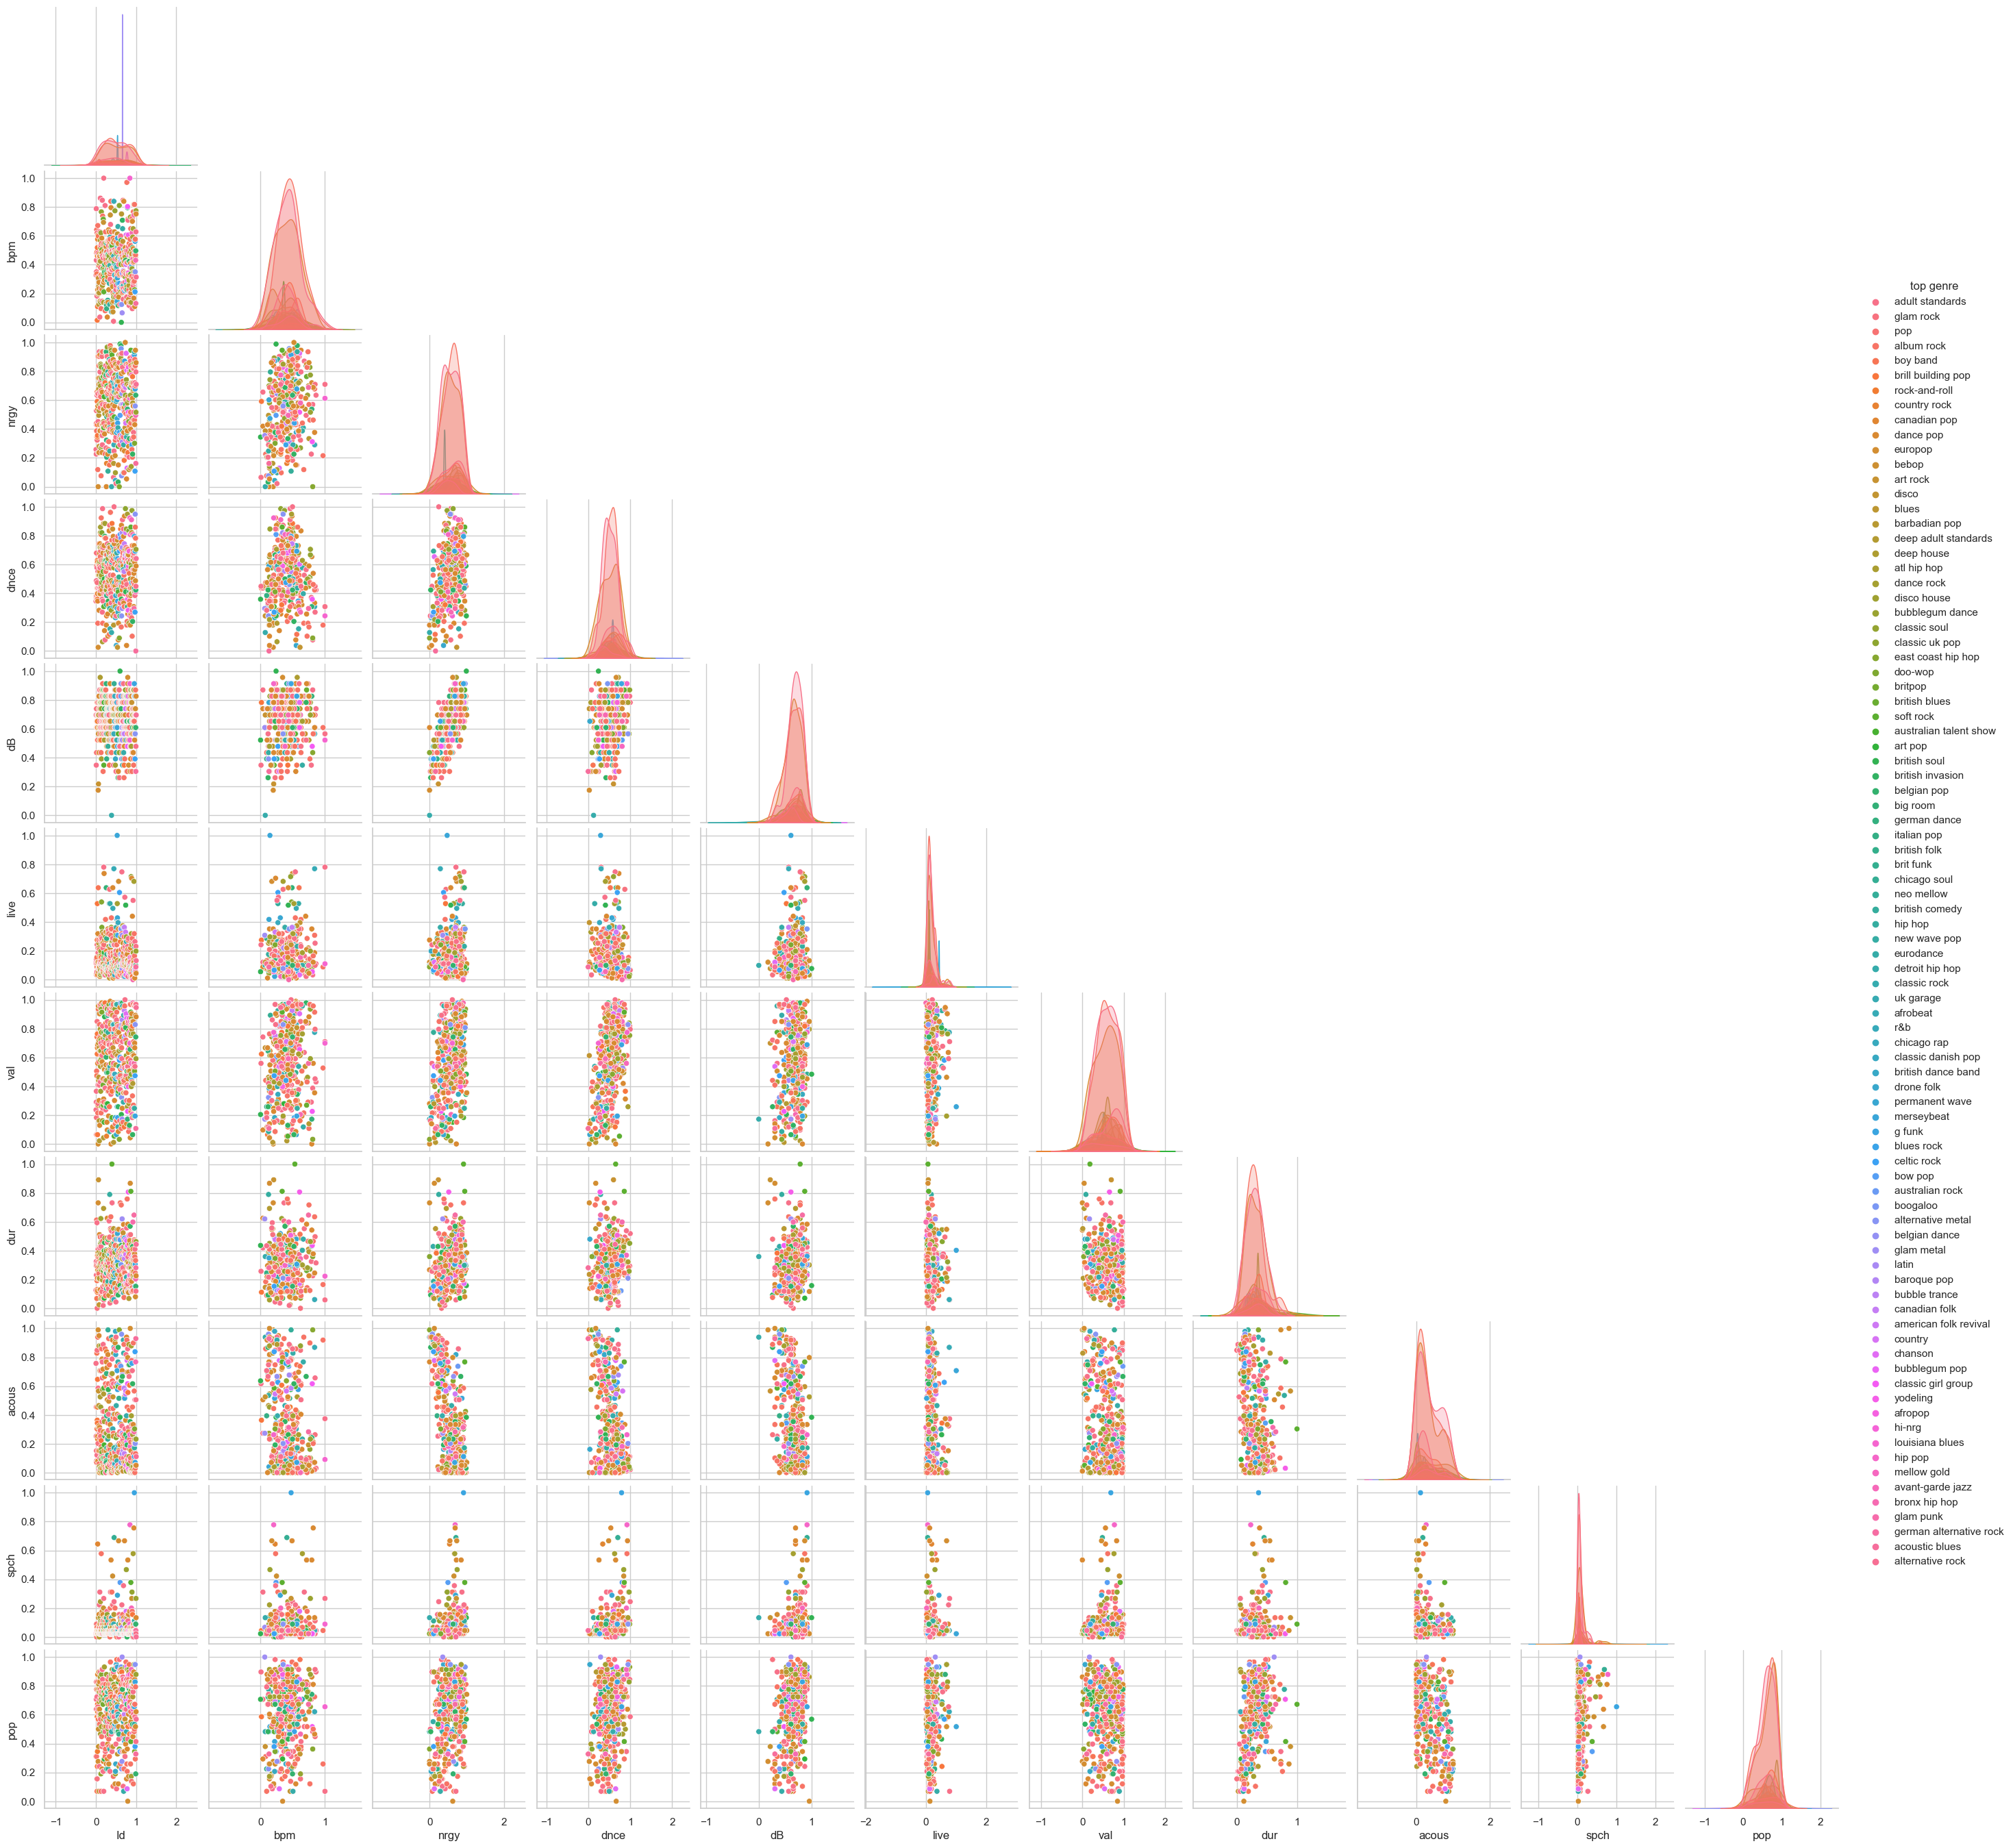

In [58]:
# Create a pair plot
sns.set(style="whitegrid")
g = sns.pairplot(data=data1, hue="top genre", corner=True, palette='husl')

plt.show()

In [59]:
#Investigating possible null values

nullVals = df[df.isnull().any(axis=1)]
nullVals

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre


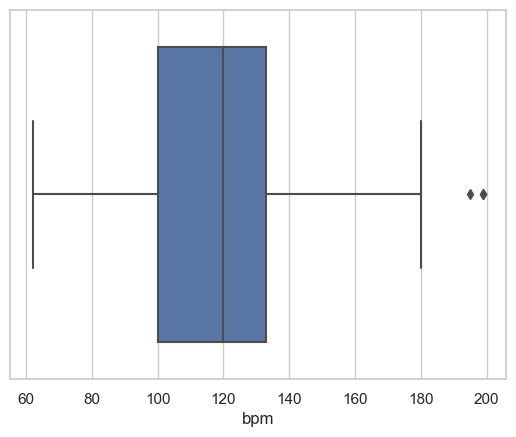

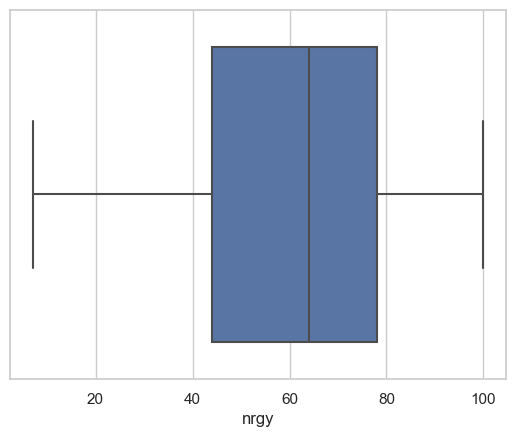

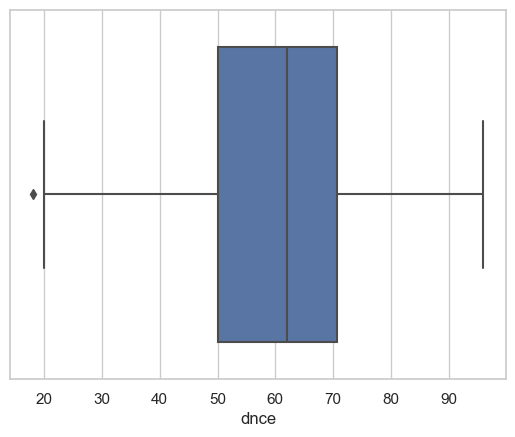

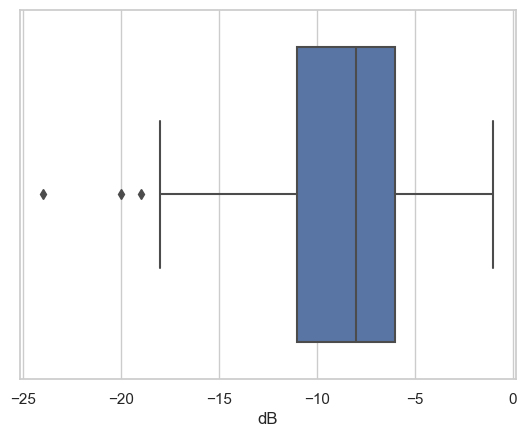

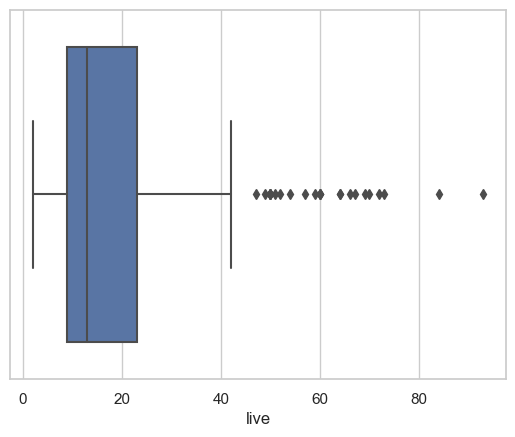

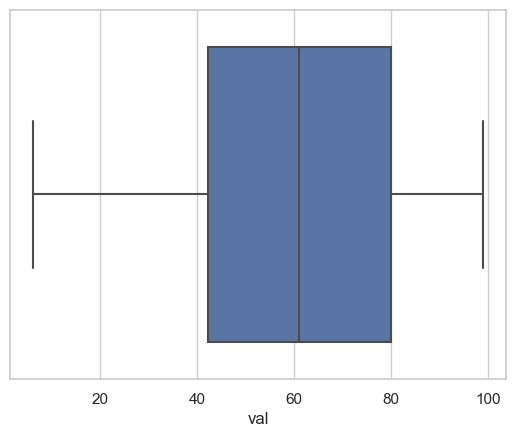

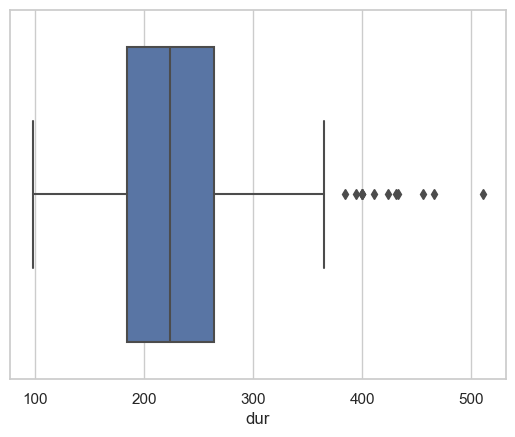

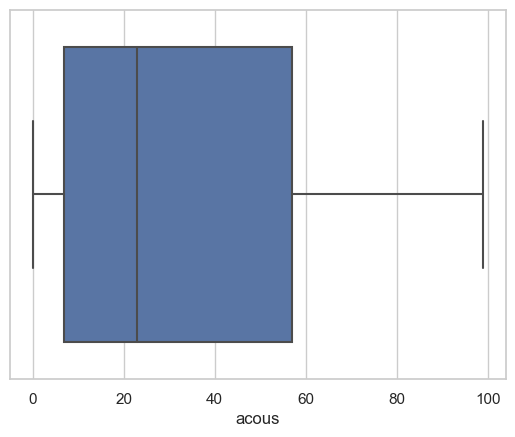

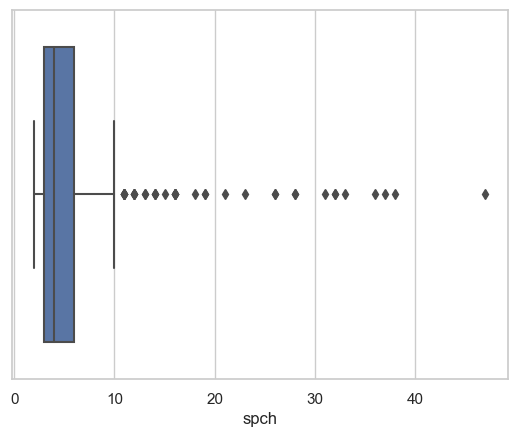

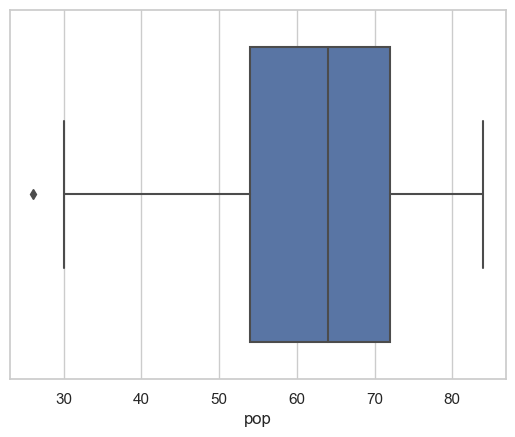

In [60]:
#Investigating possible outliers for various attributes

import seaborn as sns
sns.boxplot(x=df['bpm']) #outliers to right (not a lot)
plt.show()
sns.boxplot(x=df['nrgy']) #no outliers
plt.show()
sns.boxplot(x=df['dnce']) #outlier to left
plt.show()
sns.boxplot(x=df['dB']) # outliers to left (less)
plt.show()
sns.boxplot(x=df['live']) # many outliers (right)
plt.show()
sns.boxplot(x=df['val']) # no outliers
plt.show()
sns.boxplot(x=df['dur']) # many outliers (right)
plt.show()
sns.boxplot(x=df['acous']) # no visible outliers
plt.show()
sns.boxplot(x=df['spch']) # many outliers (right)
plt.show()
sns.boxplot(x=df['pop']) # less outliers (left)
plt.show()

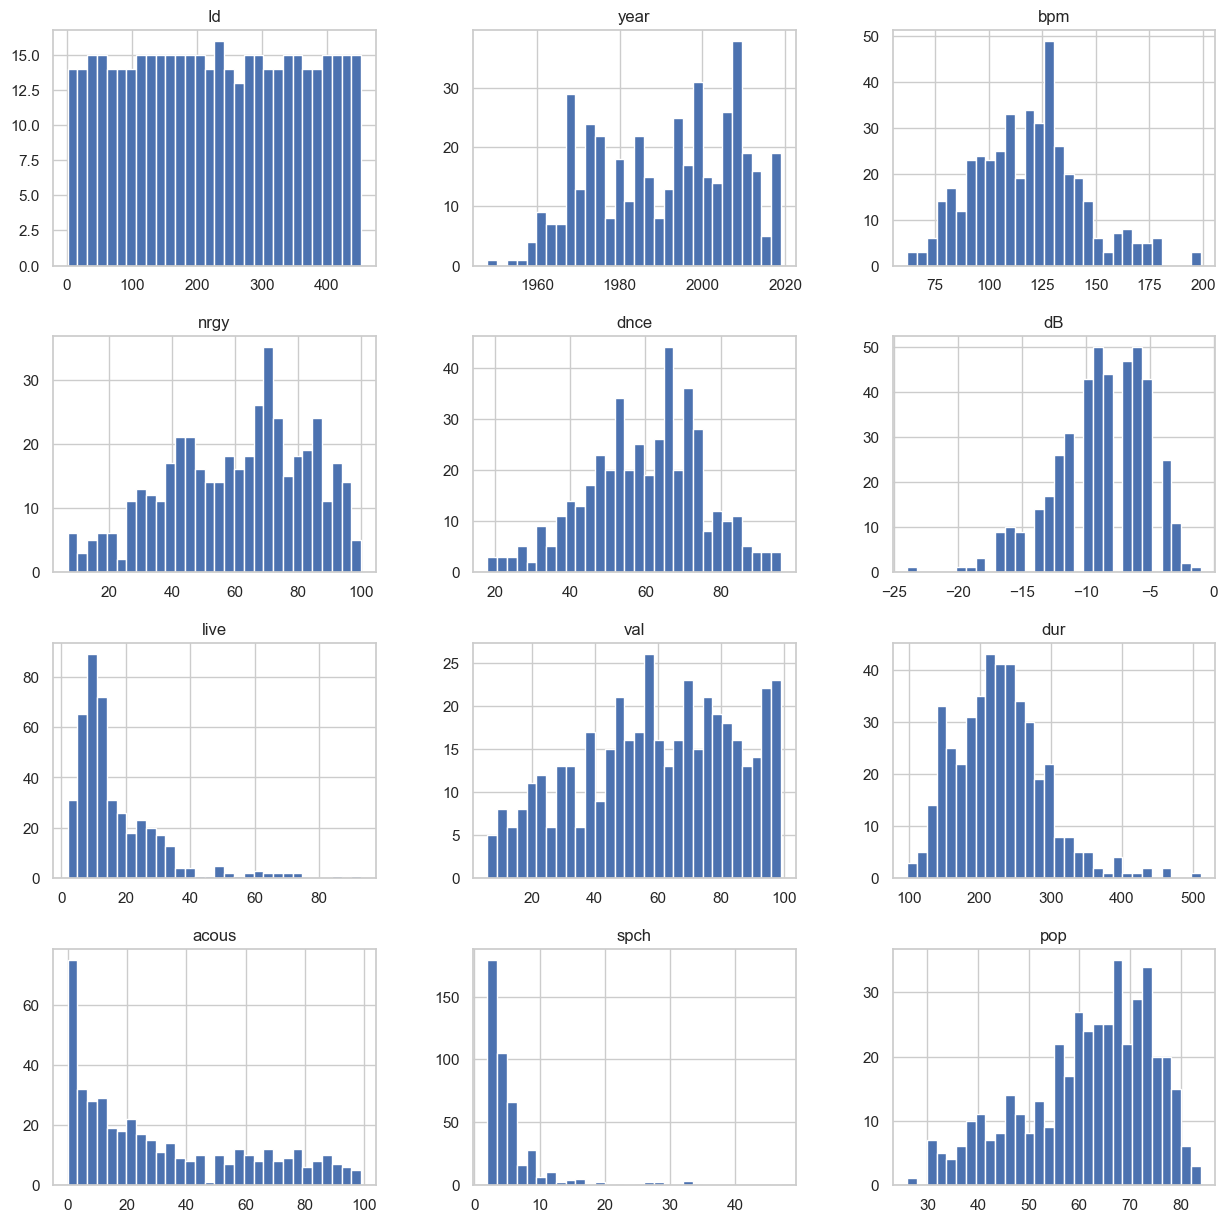

In [61]:
#Investigating skew of data
df.hist(bins=30, figsize=(15,15))
plt.show()

#right skewed for 'live', 'acous', 'spch', 'dur' attributes
#left skewed for 'nrgy', 'dB', 'val', 'pop' attributes
#roughly symmetrical for 'dnce', 'bpm' attributes
#ID and year distributions aren't being analyzed here -- categorical variables that don't affect response variable class

## Conclusions Based on Histograms and Boxplots ##

Distributions of attributes dnce, bpm, nrgy, and val are roughly (ROUGHLY) symmetrical so should contribute to more accurate response variable classifications whereas the skewed nature (indicating many outliers) of other attributes could contribute to more inaccurate predictions (higher variance).

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classes = y #using the classes of response variable

X_train, X_test, y_train, y_test = train_test_split(X_rescaled, classes, test_size=0.2, random_state=21) #train test split
NB = GaussianNB() #using Gaussian NB 
NB.fit(X_train, y_train) #fitting to Gaussian NB
NB_predictions = NB.predict(X_test) #predicting using Gaussian NB
NB_predictions = pd.DataFrame(NB_predictions) #putting these predictions into a dataframe
#print(NB_predictions)

display = pd.DataFrame(y_test) #putting normal y_test values into a dataframe as well
display = display.reset_index(drop=True) 
#print(display)
display = pd.concat([display, NB_predictions], axis =1, ignore_index = True) #creating a dataframe with actual y_test values and predicted values for comparison purposes
#print(display) 

display['Equal'] = display.iloc[:,0] == display.iloc[:,1] #creating another column in the dataframe of Bools of whether the values in both columns are equal or not
print(display) #printing the new display with the extra column

accuracy = accuracy_score(y_test, NB_predictions) #predicting accuracy of the NB classifier
print(f"Accuracy: {accuracy:.2f}") #printing accuracy

                  0                1  Equal
0     belgian dance       dance rock  False
1    classic uk pop            disco  False
2           afropop       album rock  False
3        album rock  adult standards  False
4         dance pop        glam rock  False
..              ...              ...    ...
83            disco   classic uk pop  False
84  adult standards  adult standards   True
85  detroit hip hop        dance pop  False
86        dance pop        dance pop   True
87       album rock       dance rock  False

[88 rows x 3 columns]
Accuracy: 0.26
